# Homework & Practice
__Hands-on Task__
- Apply PCA to the Wine Dataset from ScikitLearn
- Analize the explained variance and visualize the results

__Challenge__
- Use PCA to preprocess the dataset before applying a classification model (e.g. Logistic Regression or Random Forest)
- Compare the accuracy before and after PCA

__Extra__
- Try dimensionality reduction on a large dataset from kaggle (e.g. MNIST digits) and visualize the results using t-SNE or PCA

Explained the Variance Ratio:  [0.36198848 0.1920749 ]


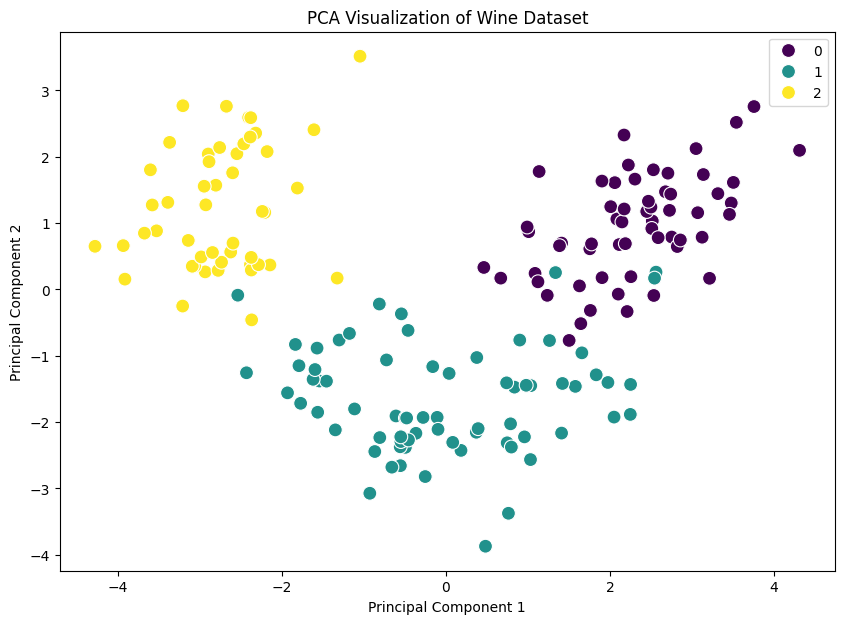

Logistic Regression Accuracy Before PCA: 1.00
Random Forest Accuracy Before PCA: 1.0
Logistic Regression Accuracy Ater PCA: 1.00
Random ForestAccuracy After PCA: 1.00


In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 
import seaborn as sns

# Load the Wine Dataset
wine = load_wine()
X = wine.data 
y = wine.target

# Standarize the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Analize the results
explained_variance = pca.explained_variance_ratio_
print('Explained the Variance Ratio: ', explained_variance)

# Visualize the results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='viridis', s=100)
plt.title('PCA Visualization of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc = 'best')
plt.show()

# Classification Task: Before PCA
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_accuracy_before = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy Before PCA: {lr_accuracy_before:.2f}')

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy_before = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy Before PCA: {rf_accuracy_before}')

# Classification Task: After PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Logistic Regression
lr.fit(X_train_pca, y_train_pca)
y_pred_rf_pca = lr.predict(X_test_pca)
lr_accuracy_after = accuracy_score(y_test_pca, y_pred_rf_pca)
print(f'Logistic Regression Accuracy Ater PCA: {lr_accuracy_after:.2f}')

# Random Forest
rf.fit(X_train_pca, y_train_pca)
y_pred_rf_pca = rf.predict(X_test_pca)
rf_accuracy_after = accuracy_score(y_test_pca, y_pred_rf_pca)
print(f'Random ForestAccuracy After PCA: {rf_accuracy_after:.2f}')

../../Kaggle_Datasets/mnist/fashion-mnist_train.csv


/Users/daniloangeltitorodriguez/Documents/ML/Platzi/.env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


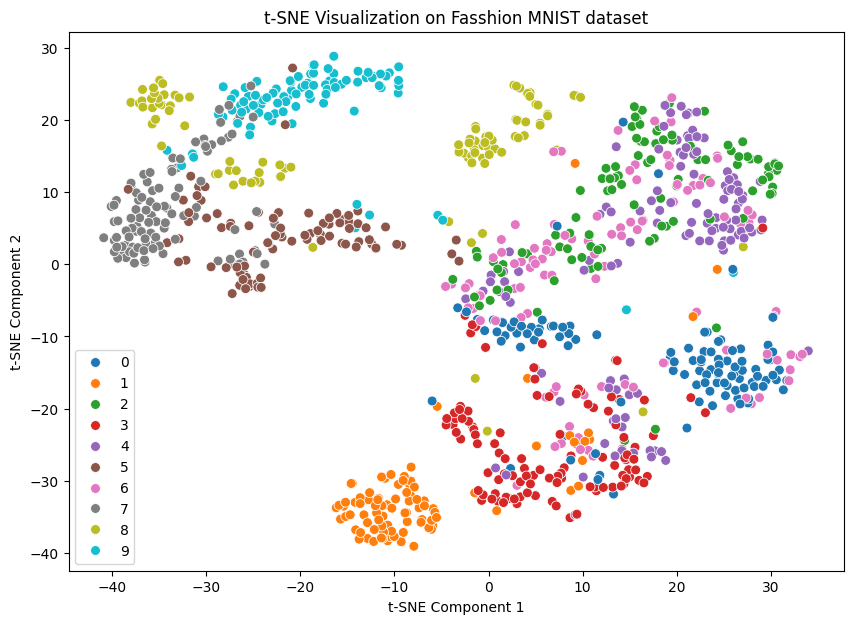

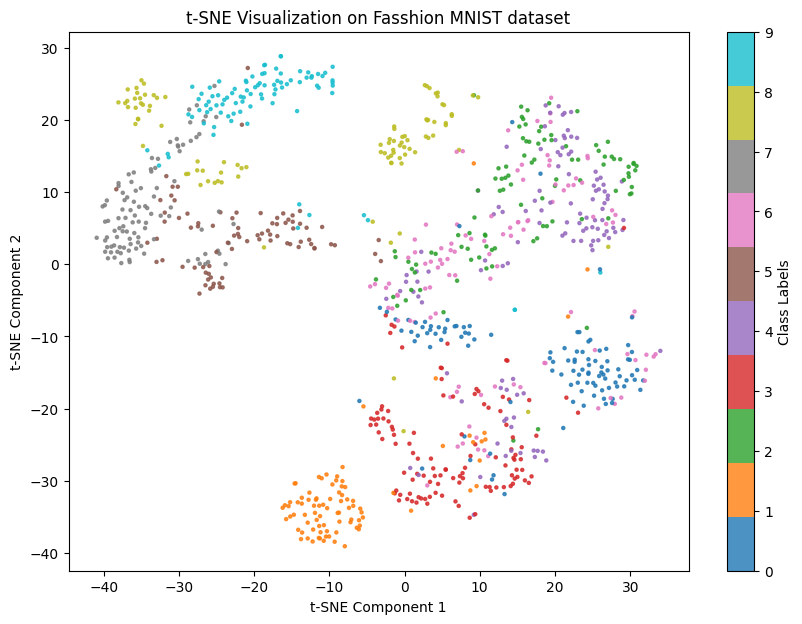

In [2]:
from my_functions import load_kaggle_dataset, clean_up

from sklearn.datasets import fetch_openml
from sklearn.manifold import TSNE

# Load the dataset using a custom function
dataset_name = 'zalando-research/fashionmnist'
extract_path = '../../Kaggle_Datasets/mnist'
csv_name = 'fashion-mnist_train.csv'
df = load_kaggle_dataset(dataset_name, extract_path, csv_name)

X_mnist, y_mnist = df.drop(columns=['label']).values, df['label'].values.astype(int)
X_mnist = X_mnist[:1000]
y_mnist = y_mnist[:1000]
# Standardize the MNIST dataset
X_mnist_scaled = scaler.fit_transform(X_mnist)

# Apply PCA to reduce to 50 dimensions for visualization purposes
pca_mnist = PCA(n_components = 50, random_state=42)
X_mnist_pca = pca_mnist.fit_transform(X_mnist_scaled)

# Apply t-SNE for dimensionality reduction tot 2 components
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_mnist_tsne = tsne.fit_transform(X_mnist_pca)

# Visualize t-SNE results
plt.figure(figsize=(10,7))
sns.scatterplot(
    x=X_mnist_tsne[:, 0], 
    y=X_mnist_tsne[:, 1], 
    hue=y_mnist, 
    palette='tab10', 
    s=50, 
)
plt.title('t-SNE Visualization on Fasshion MNIST dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()
plt.figure(figsize=(10,7))
scatter = plt.scatter(
    X_mnist_tsne[:, 0], 
    X_mnist_tsne[:, 1],
    c=y_mnist, 
    cmap='tab10', 
    s=5, 
    alpha=0.8
)
plt.colorbar(scatter, label='Class Labels')
plt.title('t-SNE Visualization on Fasshion MNIST dataset')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

/Users/daniloangeltitorodriguez/Documents/ML/Platzi/.env/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


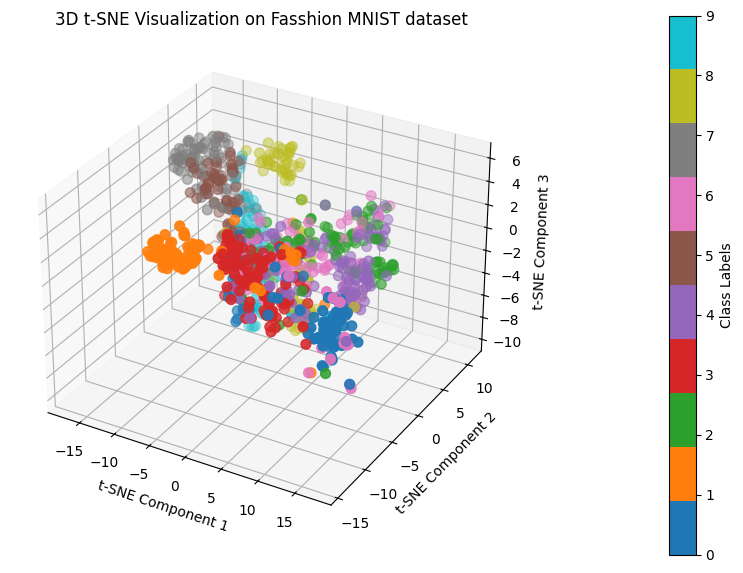

In [3]:
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE for dimensionality reduction tot 2 components
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_mnist_tsne_3d = tsne.fit_transform(X_mnist_pca)

# Visualize t-SNE results
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    X_mnist_tsne_3d[:, 0], 
    X_mnist_tsne_3d[:, 1], 
    X_mnist_tsne_3d[:, 2],
    c=y_mnist, 
    cmap='tab10', 
    s=50, 
)
ax.set_title('3D t-SNE Visualization on Fasshion MNIST dataset')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Add colorbar for clarity
cbar = fig.colorbar(scatter, ax=ax, pad=0.2)
cbar.set_label('Class Labels')

plt.show()